In [2]:
import matplotlib.pyplot as plt
import pandas as pd
from datasets import load_dataset

# Loading dataset
dataset = load_dataset("lukebarousse/data_jobs") 
df = dataset['train'].to_pandas()

# data cleanup
df['job_posted_date'] = pd.to_datetime(df.job_posted_date)

c:\Users\ELCOT\Learn python\venv\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


### Line Chart - Plotting Job posting dates 

In [3]:
df.job_posted_date.head()

0   2023-06-16 13:44:15
1   2023-01-14 13:18:07
2   2023-10-10 13:14:55
3   2023-07-04 13:01:41
4   2023-08-07 14:29:36
Name: job_posted_date, dtype: datetime64[ns]

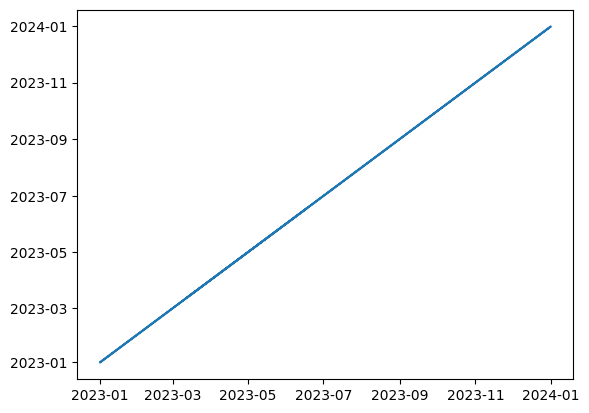

In [4]:
plt.plot(df.job_posted_date, df.job_posted_date)

In [5]:
# to count how many job posting are happening relative to the job posted date
date_counts= df.job_posted_date.value_counts()

print(date_counts)
type(date_counts)

date_counts = date_counts.sort_values()

job_posted_date
2023-08-24 11:35:33    10
2023-01-01 23:37:09    10
2023-01-01 14:07:23    10
2023-11-09 09:02:12    10
2023-06-20 17:19:57    10
                       ..
2023-06-08 07:43:38     1
2023-01-12 06:12:32     1
2023-10-16 06:01:53     1
2023-10-07 06:15:14     1
2023-06-07 06:18:29     1
Name: count, Length: 607192, dtype: int64


* To plot job counts and job posted month,i have to add a job posted month coloumn

In [6]:
df['job_posted_month'] = df['job_posted_date'].dt.month
df

,job_title_short,job_title,job_location,job_via,job_schedule_type,job_work_from_home,search_location,job_posted_date,job_no_degree_mention,job_health_insurance,job_country,salary_rate,salary_year_avg,salary_hour_avg,company_name,job_skills,job_type_skills,job_posted_month
0,Senior Data Engineer,Senior Clinical Data Engineer / Principal Clin...,"Watertown, CT",via Work Nearby,Full-time,False,"Texas, United States",2023-06-16 13:44:15,False,False,United States,None,NaN,NaN,Boehringer Ingelheim,None,None,6
1,Data Analyst,Data Analyst,"Guadalajara, Jalisco, Mexico",via BeBee México,Full-time,False,Mexico,2023-01-14 13:18:07,False,False,Mexico,None,NaN,NaN,Hewlett Packard Enterprise,"['r', 'python', 'sql', 'nosql', 'power bi', 't...","{'analyst_tools': ['power bi', 'tableau'], 'pr...",1
2,Data Engineer,"Data Engineer/Scientist/Analyst, Mid or Senior...","Berlin, Germany",via LinkedIn,Full-time,False,Germany,2023-10-10 13:14:55,False,False,Germany,None,NaN,NaN,ALPHA Augmented Services,"['python', 'sql', 'c#', 'azure', 'airflow', 'd...","{'analyst_tools': ['dax'], 'cloud': ['azure'],...",10
3,Data Engineer,LEAD ENGINEER - PRINCIPAL ANALYST - PRINCIPAL ...,"San Antonio, TX",via Diversity.com,Full-time,False,"Texas, United States",2023-07-04 13:01:41,True,False,United States,None,NaN,NaN,Southwest Research Institute,"['python', 'c++', 'java', 'matlab', 'aws', 'te...","{'cloud': ['aws'], 'libraries': ['tensorflow',...",7
4,Data Engineer,Data Engineer- Sr Jobs,"Washington, DC",via Clearance Jobs,Full-time,False,Sudan,2023-08-07 14:29:36,False,False,Sudan,None,NaN,NaN,Kristina Daniel,"['bash', 'python', 'oracle', 'aws', 'ansible',...","{'cloud': ['oracle', 'aws'], 'other': ['ansibl...",8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
785736,Software Engineer,DevOps Engineer,Singapura,melalui Trabajo.org,Pekerjaan tetap,False,Singapore,2023-03-13 06:16:16,False,False,Singapore,None,NaN,NaN,CAREERSTAR INTERNATIONAL PTE. LTD.,"['bash', 'python', 'perl', 'linux', 'unix', 'k...","{'os': ['linux', 'unix'], 'other': ['kubernete...",3
785737,Data Analyst,CRM Data Analyst,"Bad Rodach, Jerman",melalui BeBee Deutschland,Pekerjaan tetap,False,Germany,2023-03-12 06:18:18,False,False,Germany,None,NaN,NaN,HABA FAMILYGROUP,"['sas', 'sas', 'sql', 'excel']","{'analyst_tools': ['sas', 'excel'], 'programmi...",3
785738,Business Analyst,Commercial Analyst - Start Now,Malaysia,melalui Ricebowl,Pekerjaan tetap,False,Malaysia,2023-03-12 06:32:36,False,False,Malaysia,None,NaN,NaN,Lendlease Corporation,"['powerpoint', 'excel']","{'analyst_tools': ['powerpoint', 'excel']}",3
785739,Data Engineer,"Principal Associate, Data Engineer (Remote-Eli...","Newark, New Jersey, Amerika Serikat",melalui Recruit.net,Pekerjaan tetap,False,Sudan,2023-03-12 06:32:15,False,False,Sudan,None,NaN,NaN,Capital One,"['python', 'go', 'nosql', 'sql', 'mongo', 'she...","{'cloud': ['aws', 'snowflake', 'azure', 'redsh...",3


In [7]:
monthly_counts = df.job_posted_month.value_counts()
monthly_counts = monthly_counts.sort_index()
monthly_counts

job_posted_month
1     91822
2     64578
3     64084
4     62919
5     52104
6     61572
7     63777
8     75162
9     62359
10    66611
11    64450
12    56303
Name: count, dtype: int64

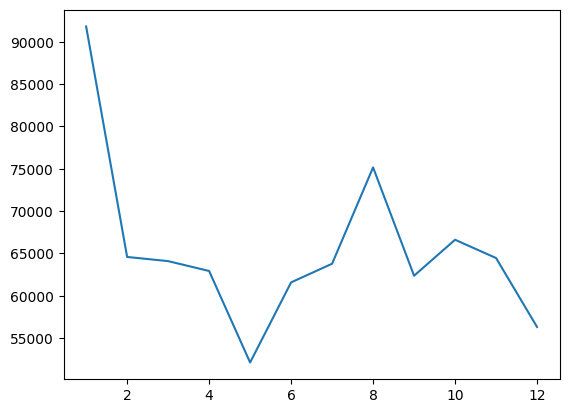

In [8]:
plt.plot(monthly_counts.index, monthly_counts)

### Bar Chart - counts of job posting

In [22]:
job_count = df.job_title_short.value_counts()

<BarContainer object of 10 artists>

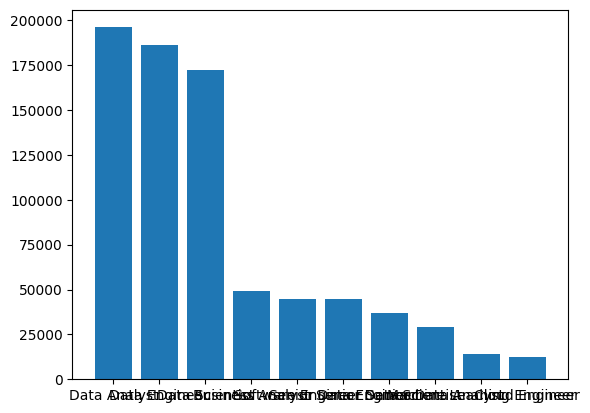

In [23]:
plt.bar(job_count.index,job_count)

<BarContainer object of 10 artists>

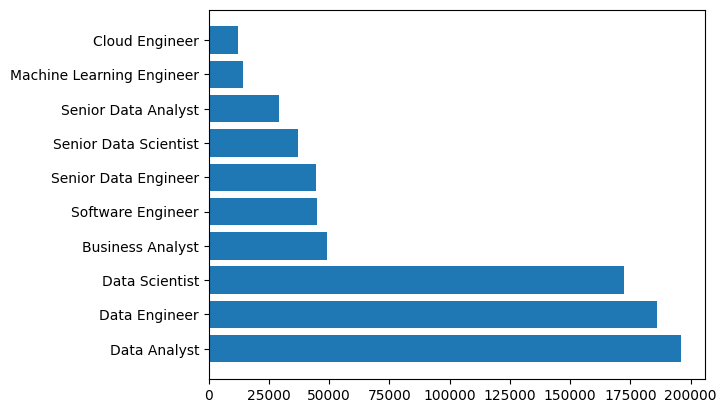

In [24]:
plt.barh(job_count.index,job_count)

<BarContainer object of 10 artists>

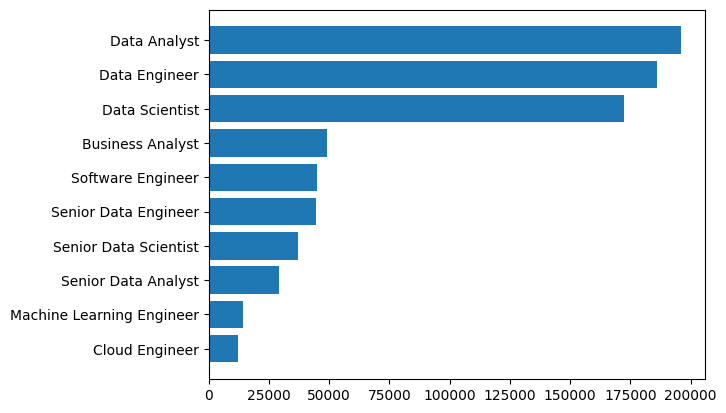

In [25]:
job_counts= job_count.sort_values(ascending=True)
plt.barh(job_counts.index,job_counts)

* `Labelling` 

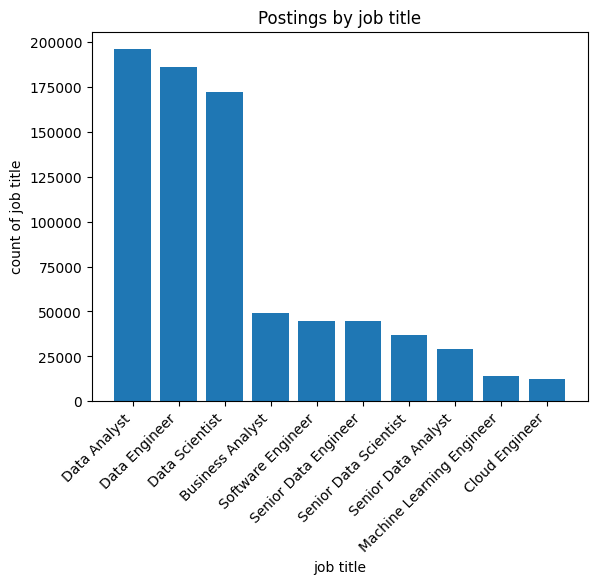

In [30]:
plt.bar(job_count.index,job_count)
plt.title('Postings by job title')
plt.ylabel('count of job title')
plt.xlabel('')
plt.xticks(rotation=45,ha='right')
plt.show()

### plotting using pandas and matplotlib

#### `Series`

<Axes: xlabel='job_title_short'>

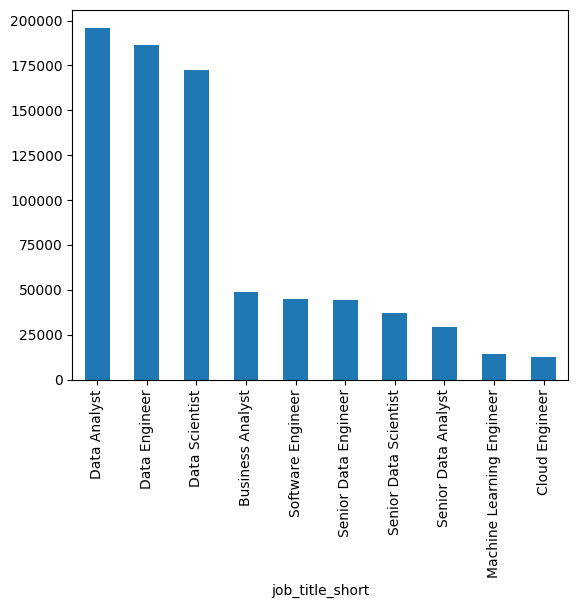

In [34]:
job_count.plot(kind='bar')     #job_count is Series


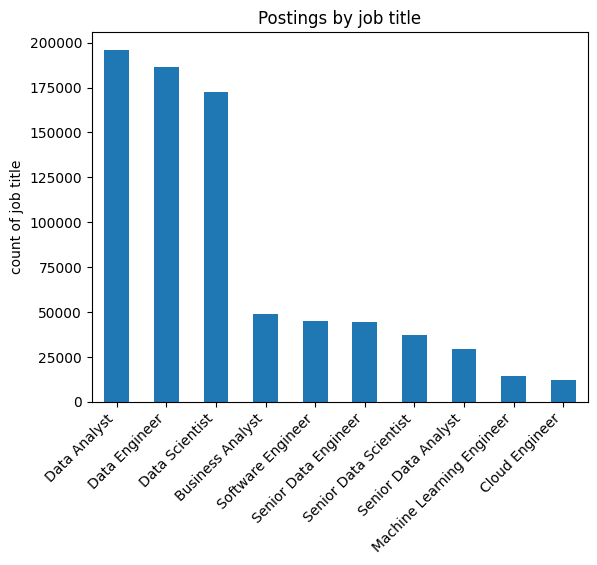

In [37]:
job_count.plot(kind='bar')
plt.title('Postings by job title')
plt.ylabel('count of job title')
plt.xlabel('')
plt.xticks(rotation=45, ha='right')
plt.show()

#### `Dataframe`

In [51]:
df1=df[['job_posted_month','salary_year_avg']].dropna(subset=['salary_year_avg']).head()

<Axes: xlabel='job_posted_month'>

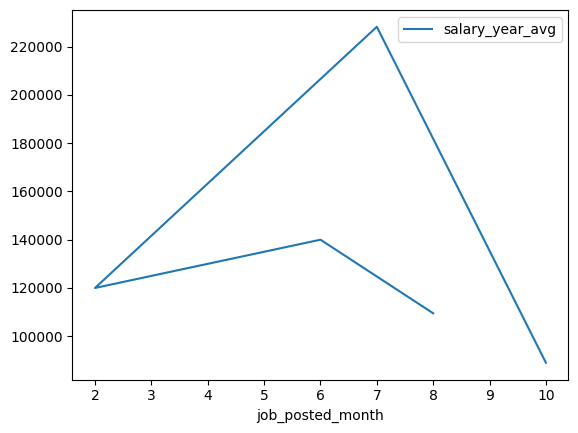

In [52]:
df1.plot(x='job_posted_month',y='salary_year_avg',kind='line')